<a href="https://colab.research.google.com/github/StickMonkey615/JHCSMod4/blob/main/Final%20Classifier%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Guidance

This notebook is a template for module 4b and 4c, which will be tested in Google Colab, your code needs to run there.
The structure has been provided to improve consistency and make it easier for markers to understand your code but still give students the flexibility to be creative.  You need to populate the required functions to solve this problem.  All dependencies should be documented in the next cell.

You can:
    add further cells or text blocks to extend or further explain your solution
    add further functions

Dont:
    rename functions
   

In [1]:
# Fixed dependencies - do not remove or change.
import pytest
import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/gdrive/')
# Import your dependencies
!pip install --upgrade xlrd > 1.2.0
!pip install imbalanced-learn
!pip install --upgrade imbalanced-learn
import xlrd
import imblearn
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [2]:
# Import data

def import_local_data(file_path):
    """This function needs to import the data file into collab and return a pandas dataframe
    """
    raw_df = pd.read_excel(file_path)
    return raw_df

In [3]:
local_file_path = "breast-cancer.xls"

In [4]:
# Dont change
raw_data = import_local_data(local_file_path)

### Conduct exploratory data analysis and explain your key findings - Examine the data, explain its key features and what they look like.  Highlight any fields that are anomalous.

In [5]:
# Look at the different dataframe column headings
print(raw_data.columns)

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')


In [6]:
# Determine data types for each column
no_col =len(raw_data.columns)
for i in range(0, no_col):
    print(type(raw_data.values[1][i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [7]:
# Look at integer data
print(raw_data.iloc[:, 5].values)

[3 1 2 3 2 2 3 2 2 2 2 2 1 2 2 3 1 2 2 3 1 2 2 1 3 2 2 1 3 3 3 1 3 3 1 1 2
 3 3 1 3 2 2 3 1 3 2 3 2 3 1 3 3 1 2 3 1 3 1 2 3 2 3 3 2 1 2 2 2 1 3 1 1 3
 3 1 1 2 3 2 2 2 1 2 2 3 1 2 1 1 1 3 1 2 2 2 1 1 3 1 2 2 3 2 1 2 2 2 1 2 1
 2 2 3 1 1 3 1 2 1 3 2 2 3 2 1 2 2 2 2 2 2 3 2 3 1 1 1 3 1 3 2 2 2 2 3 2 1
 2 3 2 2 2 3 2 1 2 2 1 3 3 2 2 3 3 2 2 2 2 2 2 3 2 1 3 2 2 3 2 1 2 3 1 3 1
 1 3 3 2 2 2 2 3 2 2 2 1 1 3 3 2 3 3 1 1 3 2 3 3 1 3 1 2 1 2 1 3 2 1 2 1 3
 2 2 3 1 3 2 2 2 2 2 2 1 2 2 3 3 2 3 3 2 2 2 1 2 2 1 1 1 3 2 1 1 3 3 2 3 2
 2 3 1 2 2 3 2 3 3 1 1 3 3 2 2 3 2 2 2 2 2 3 2 2 2 2 3]


Although stored as integers, it can only hold 3 possible values and so can be viewed as catagorical data

In [8]:
# Look at output data
print(raw_data.iloc[:, -1].values)

['recurrence-events' 'no-recurrence-events' 'recurrence-events'
 'no-recurrence-events' 'recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'recurrence-events'
 'recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'recurrence-events' 'no-re

Only 2 possible outputs, thus needs converting to binary format for use in classifier models.

In [9]:
# Check output balance
out = raw_data.iloc[:, -1].values
no_rows = len(raw_data)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
code_rows = le.fit_transform(out)
print(sum(code_rows)/no_rows) 

0.2972027972027972


Clear imbalance between output data. Some degree of bias/weighting/sampling will be required to ensure that results accurately predict outcomes for both True and False outcomes.

In [10]:
# Explain your key findings

**Data set is made up of 9 independent variables all of which appear catagorical in nature. Although stored as an integer, 'deg-malig' can be viewed as  catagorical data as it can only contain 3 discrete values.**

**Data set is imbalanced, with dependent variable outputs only True in 30% of instances. The model applied will require this imbalance to be taken into account so as not to sacrifice results predicting this smaller class (surely the aim of cancer diagnosis) so as to achieve a high accuracy figure.**

**Output variable will need converting into binary output for use with a binary classification model.**

Create any data pre-processing that you will conduct on seen and unseen data.  Regardless of the model you use, this dataframe must contain only numeric features and have a strategy for any expected missing values. Any objects can that are needed to handle the test data that are dependent on the training data can be stored in the model class.  You are recommended to use sklearn Pipelines or similar functionality to ensure reproducibility.

In [11]:
class Module4_Model:
    
    def __init__(self):
        self.model = None

    def process_dataframe(sel, unproc_data):
        '''
        '''
        # Remove non-categorical data
        dm = unproc_data.pop('deg-malig')

        # Encode the catagorical data (dummy variables)
        proc_data = pd.get_dummies(data=unproc_data, prefix_sep='_', drop_first=True)
    
        # Add back in non-categorical data
        proc_data.insert(0, 'deg-malig', dm)
    
        return proc_data
        
    def preprocess_training_data(self, training_df):
        """
        This function should process the training data and store any features required in the class
        """
        # Apply feature scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        processed_df = sc.fit_transform(training_df)
        return processed_df

    def preprocess_test_data(self, test_df):

        # Apply feature scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        processed_df = sc.fit_transform(test_df)
        return processed_df



In [12]:
# Dont change
my_model = Module4_Model()

# clean up data and create dataframe of only catagocial numeric data
clean_data = my_model.process_dataframe(raw_data)

In [13]:
# Split your data so that you can test the effectiveness of your model
# Split the data into a Training set and a Test set
dfs = np.split(clean_data, [len(clean_data.columns)-1], axis=1)
X = dfs[0]
y = dfs[1]
#X = raw_data.iloc[:, :-1].values
#y = raw_data.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
# Dont change
x_train_processed = my_model.preprocess_training_data(X_train)

In [15]:
# Populate preprocess_training_data and preprocess_test_data to preprocess data.
# You must process test and train separately so your model does not accidently gain information that a model wouldnt have in reality and therefore get better predictions


In [16]:
# Dont change
x_test_processed = my_model.preprocess_test_data(X_test)

In [30]:
# Create a model
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
classifier = EasyEnsembleClassifier(n_estimators=10,
                                    base_estimator=RandomForestClassifier(n_estimators=100,
                                                                          criterion='entropy',
                                                                          class_weight='balanced_subsample'))

In [31]:
# Train your model
classifier.fit(x_train_processed, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EasyEnsembleClassifier(base_estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                             criterion='entropy'))

In [32]:
# use your model to make a prediction on unseen data
y_pred = classifier.predict(x_test_processed)

Accuracy: 70.83 %
Weighted ROC AUC accuracy: 70.00 %
Confusion matrix:


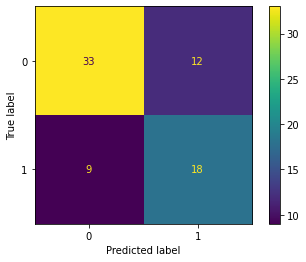

K-fold cross validation results
Accuracy: 64.50 %
Standard Deviation: 14.21 %


In [35]:
# Asssess the accuracy of your model and explain your key findings
# Generate confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
print("Weighted ROC AUC accuracy: {:.2f} %".format(roc_auc_score(y_test, y_pred, average='weighted')*100))
print("Confusion matrix:")
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

# Apply k-fold Cross Validation
from sklearn.model_selection import cross_val_score
from numpy import ravel
accuracies = cross_val_score(estimator = classifier, X = x_train_processed, y = ravel(y_train.values), scoring = 'roc_auc_ovo', cv = 10)
print("K-fold cross validation results")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

**Model is approx 65-70% accurate at predicting whether cancer recurrence will occur.**

**Crucially, only 12.5% of predictions are False Negatives. In cancer diagnosis these are the outcomes that we want to minimise. False Positives, whilst undesirable, will likely lead to further diagnostic testing before it is realised that cancer is not present.**

### Unit tests:

###Checking training and test data for null values. This will work for both pd dataframes and np arrays, and ensures no null values exist.

In [21]:
def test_no_nulls(data):
    """ Assert no null values within pd dataframe or np array """
    
    # if data is numpy array, handle accordingly
    if isinstance(data, (np.ndarray)):
        assert not np.isnan(np.min(data))
    
    # if not np array, assume data is pandas dataframe
    else:
        assert data.isna().sum().sum() == 0

In [22]:
# run null data unit test on both training and test data
test_no_nulls(x_train_processed)
test_no_nulls(x_test_processed)